In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn import tree

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load dataset
pima = pd.read_csv("/content/drive/MyDrive/ML/Copy of diabetes.csv", encoding='utf8', engine='python')
drive.flush_and_unmount()

In [ ]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# feature selection
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
X = pima[feature_cols]
y = pima.Outcome


In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix
Y_pred = KNN.predict(X_test)
#Accuray of the model 
print("Accuracy:", accuracy_score(y_test, Y_pred))
print(confusion_matrix(y_test, Y_pred))

Accuracy: 0.6883116883116883
[[73 26]
 [22 33]]


In [ ]:
error = []
import numpy as np

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    print(np.mean(pred_i != y_test))

0.3116883116883117
0.2792207792207792
0.2857142857142857
0.2532467532467532
0.3116883116883117
0.3051948051948052
0.3051948051948052
0.2857142857142857
0.2987012987012987
0.2597402597402597
0.2597402597402597
0.2727272727272727
0.2792207792207792
0.23376623376623376
0.24025974025974026
0.24025974025974026
0.24025974025974026
0.2532467532467532
0.24675324675324675
0.2532467532467532
0.2662337662337662
0.2597402597402597
0.2792207792207792
0.2662337662337662
0.2662337662337662
0.2662337662337662
0.2597402597402597
0.2727272727272727
0.2597402597402597
0.2597402597402597
0.2662337662337662
0.2662337662337662
0.24675324675324675
0.24675324675324675
0.24675324675324675
0.24025974025974026
0.24025974025974026
0.2597402597402597
0.2532467532467532


Text(0, 0.5, 'Mean Error')

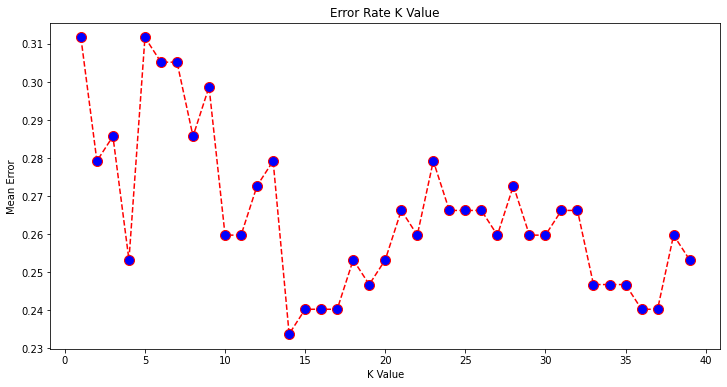

In [ ]:

from matplotlib import pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')